In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Gaia dataset
df = pd.read_csv(r"C:\Users\Kam\OneDrive - Queen's University\Year 2\PHYS 216\Project\active.csv")
print(df.describe())  # Initial overview including nulls and noise


        solution_id            ra           dec      parallax  parallax_error  \
count  6.632100e+04  66321.000000  66321.000000  55876.000000    55876.000000   
mean   1.636148e+18    265.175643    -53.674434      0.377529        0.458444   
std    0.000000e+00      0.174669      0.103271      0.917852        0.452302   
min    1.636148e+18    264.753702    -53.924233    -16.314963        0.011949   
25%    1.636148e+18    265.061540    -53.741263      0.112627        0.145287   
50%    1.636148e+18    265.176817    -53.674435      0.372070        0.304757   
75%    1.636148e+18    265.288611    -53.607603      0.625307        0.615236   
max    1.636148e+18    265.597279    -53.424840     23.857896        4.180087   

               pmra         pmdec  phot_g_mean_mag         bp_rp  \
count  55876.000000  55876.000000     66143.000000  51847.000000   
mean       1.095897    -12.549352        19.017623      1.255174   
std        3.624366      6.826617         1.556665      0.394025  

In [4]:
# Drop rows with any null values
df.dropna(inplace=True)
print(df.describe())  # Cleaner stats after dropping nulls


        solution_id            ra           dec      parallax  parallax_error  \
count  4.764300e+04  47643.000000  47643.000000  47643.000000    47643.000000   
mean   1.636148e+18    265.175834    -53.674355      0.379797        0.429745   
std    0.000000e+00      0.184718      0.109376      0.859204        0.441101   
min    1.636148e+18    264.753702    -53.924233    -16.314963        0.011949   
25%    1.636148e+18    265.044971    -53.751201      0.131721        0.131355   
50%    1.636148e+18    265.176548    -53.674188      0.371222        0.276266   
75%    1.636148e+18    265.305501    -53.597756      0.603598        0.570072   
max    1.636148e+18    265.597279    -53.424840     23.857896        4.180087   

               pmra         pmdec  phot_g_mean_mag         bp_rp  \
count  47643.000000  47643.000000     47643.000000  47643.000000   
mean       0.984536    -12.287542        18.723815      1.247050   
std        3.657976      6.885396         1.572591      0.364481  

In [5]:
# Investigate and remove invalid parallax values (< 0)
invalid_parallax_df = df[df['parallax'] < 0]
print(invalid_parallax_df.describe())  # Optional: review invalid entries

df = df[df['parallax'] >= 0]  # Drop rows with negative parallax


        solution_id           ra          dec     parallax  parallax_error  \
count  8.511000e+03  8511.000000  8511.000000  8511.000000     8511.000000   
mean   1.636148e+18   265.171501   -53.675578    -0.665066        0.729009   
std    0.000000e+00     0.199236     0.114845     0.902099        0.515049   
min    1.636148e+18   264.753702   -53.923973   -16.314963        0.030849   
25%    1.636148e+18   265.018621   -53.761542    -0.827678        0.353242   
50%    1.636148e+18   265.170724   -53.674512    -0.357155        0.584847   
75%    1.636148e+18   265.323029   -53.591397    -0.133706        0.948111   
max    1.636148e+18   265.597279   -53.425495    -0.000044        3.817167   

              pmra        pmdec  phot_g_mean_mag        bp_rp     target_ra  \
count  8511.000000  8511.000000      8511.000000  8511.000000  8.511000e+03   
mean      0.199033   -10.843117        19.743974     1.311313  2.651754e+02   
std       3.750432     6.848010         0.971057     0.37434

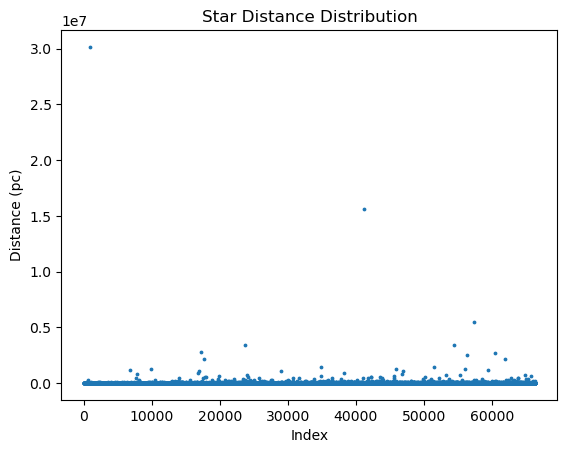

In [6]:
# Calculate distance in parsecs from parallax (mas)
df['distance_pc'] = 1000 / df['parallax']

# Visualize raw distance distribution
plt.scatter(df.index, df['distance_pc'], s=3)
plt.xlabel('Index')
plt.ylabel('Distance (pc)')
plt.title('Star Distance Distribution')
plt.show()


In [7]:
# Filter stars near cluster's expected distance: 2500 pc ± 100
tolerance = 100
df = df[(df['distance_pc'] >= 2500 - tolerance) & (df['distance_pc'] <= 2500 + tolerance)]
print(df.describe())


        solution_id           ra          dec     parallax  parallax_error  \
count  2.393000e+03  2393.000000  2393.000000  2393.000000     2393.000000   
mean   1.636148e+18   265.172606   -53.670484     0.399902        0.181744   
std    0.000000e+00     0.165139     0.096648     0.009143        0.218598   
min    1.636148e+18   264.758586   -53.919898     0.384625        0.011949   
25%    1.636148e+18   265.066671   -53.731013     0.392147        0.060233   
50%    1.636148e+18   265.170672   -53.671513     0.399328        0.108003   
75%    1.636148e+18   265.277229   -53.609764     0.407605        0.211041   
max    1.636148e+18   265.593409   -53.426586     0.416665        2.524781   

              pmra        pmdec  phot_g_mean_mag        bp_rp     target_ra  \
count  2393.000000  2393.000000      2393.000000  2393.000000  2.393000e+03   
mean      2.094663   -14.613309        17.403740     1.079175  2.651754e+02   
std       2.684356     5.818255         1.835066     0.26833

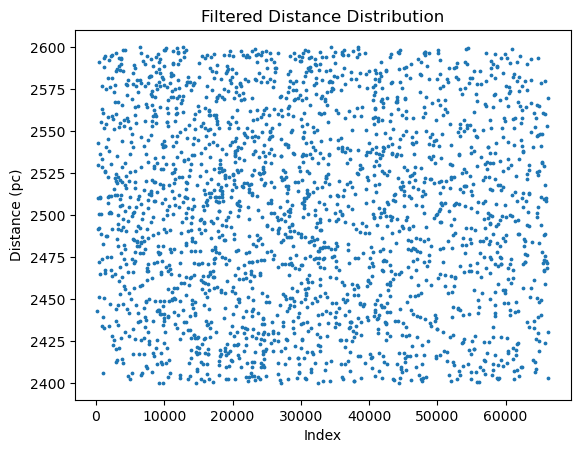

Average Cluster Distance (pc): 2501.9180784487735


In [8]:
plt.scatter(df.index, df['distance_pc'], s=3)
plt.xlabel('Index')
plt.ylabel('Distance (pc)')
plt.title('Filtered Distance Distribution')
plt.show()

print("Average Cluster Distance (pc):", df['distance_pc'].mean())


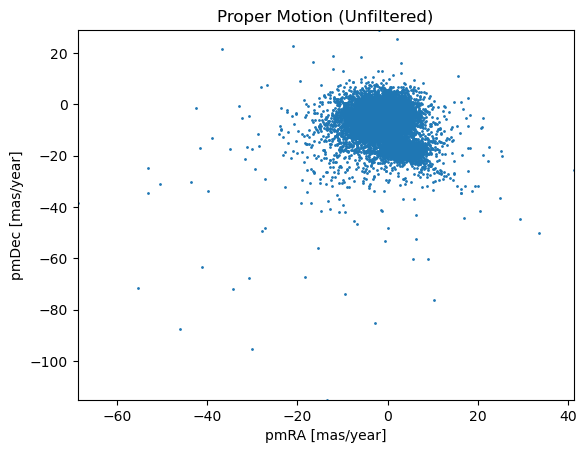

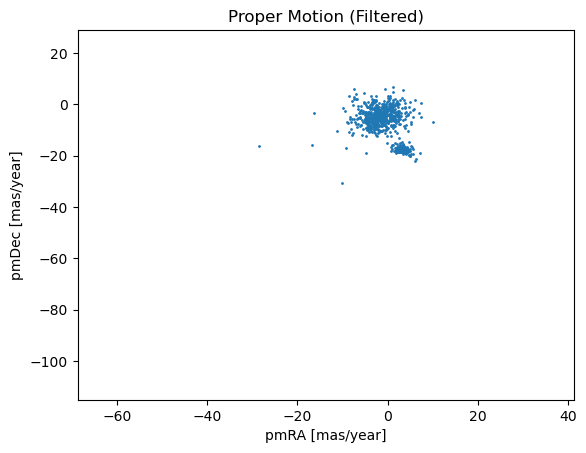

In [9]:
raw = pd.read_csv(r"C:\Users\Kam\OneDrive - Queen's University\Year 2\PHYS 216\Project\active.csv")
raw.dropna(inplace=True)

all_pmra = pd.concat([raw['pmra'], df['pmra']])
all_pmdec = pd.concat([raw['pmdec'], df['pmdec']])
x_min, x_max = all_pmra.min(), all_pmra.max()
y_min, y_max = all_pmdec.min(), all_pmdec.max()

# Unfiltered plot
plt.figure()
plt.scatter(raw['pmra'], raw['pmdec'], s=1)
plt.xlabel('pmRA [mas/year]')
plt.ylabel('pmDec [mas/year]')
plt.title('Proper Motion (Unfiltered)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# Filtered plot
plt.figure()
plt.scatter(df['pmra'], df['pmdec'], s=1)
plt.xlabel('pmRA [mas/year]')
plt.ylabel('pmDec [mas/year]')
plt.title('Proper Motion (Filtered)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


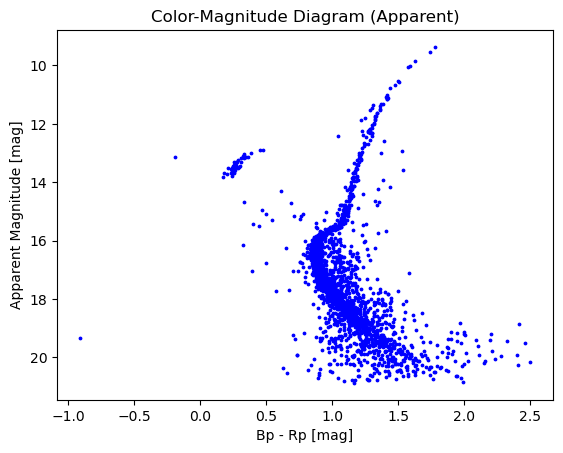

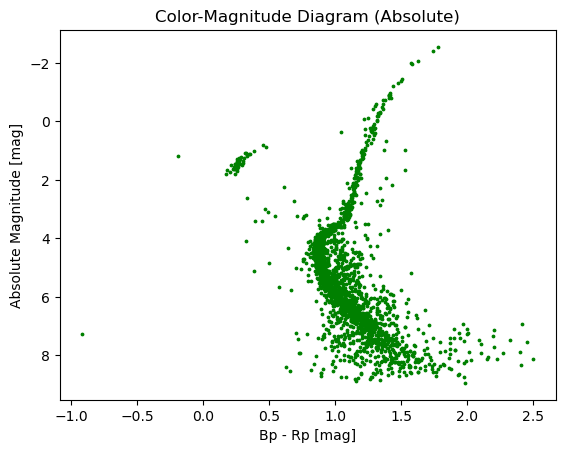

In [10]:
# Compute absolute magnitude
df['absolute_mag'] = df['phot_g_mean_mag'] - 5 * np.log10(df['distance_pc']) + 5

# CMD with apparent magnitude
plt.figure()
plt.scatter(df['bp_rp'], df['phot_g_mean_mag'], s=3, color='blue')
plt.gca().invert_yaxis()
plt.xlabel("Bp - Rp [mag]")
plt.ylabel("Apparent Magnitude [mag]")
plt.title("Color-Magnitude Diagram (Apparent)")
plt.show()

# CMD with absolute magnitude
plt.figure()
plt.scatter(df['bp_rp'], df['absolute_mag'], s=3, color='green')
plt.gca().invert_yaxis()
plt.xlabel("Bp - Rp [mag]")
plt.ylabel("Absolute Magnitude [mag]")
plt.title("Color-Magnitude Diagram (Absolute)")
plt.show()


In [11]:
df.head()


,solution_id,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_mag,bp_rp,target_id,target_ra,target_dec,target_parallax,target_pm_ra,target_pm_dec,target_radial_velocity,epoch,target_separation (deg),distance_pc,absolute_mag
193,1636148068921376768,265.181131,-53.676684,0.409363,0.023010,3.620600,-17.295148,12.391941,1.228662,NGC 6397,265.175375,-53.674333,0.416,3.3,-17.6,18.4,2000,0.004085,2442.821033,0.452483
230,1636148068921376768,265.176929,-53.669937,0.401308,0.023419,3.290484,-17.214848,13.486279,0.291720,NGC 6397,265.175375,-53.674333,0.416,3.3,-17.6,18.4,2000,0.004566,2491.853238,1.503667
235,1636148068921376768,265.167860,-53.675672,0.395289,0.028499,2.588887,-17.652995,13.700216,1.157828,NGC 6397,265.175375,-53.674333,0.416,3.3,-17.6,18.4,2000,0.004641,2529.796103,1.684788
343,1636148068921376768,265.185189,-53.675260,0.398374,0.027624,3.441691,-17.649478,14.265834,1.107967,NGC 6397,265.175375,-53.674333,0.416,3.3,-17.6,18.4,2000,0.005861,2510.200967,2.267292
364,1636148068921376768,265.182171,-53.669844,0.393236,0.035870,3.052442,-18.037578,14.782821,1.141719,NGC 6397,265.175375,-53.674333,0.416,3.3,-17.6,18.4,2000,0.006079,2543.002211,2.756087
